## Trabalho 1 de Aprendizado de Máquina - 2024.1
### Discente: Sofia Pinheiro Klautau - 202304887
#### Docente: Prof. Dr. Danilo Silva
#### Universidade Federal de Santa Catarina - PPGEEL

### Etapa 1: Carregamento de dados e EDA inicial

In [176]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor

#### 1.1) Carregando os dados do Kaggle

In [177]:
# lendo o arquivo csv com os dados
# fonte: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog?resource=download
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


#### 1.2) Conferindo se há dados faltantes no dataset

In [178]:
#checando se há dados faltantes
missing = df.isnull() #vai retornar "none" ou "NaN"

#filtrando pelos dados faltantes e criando um dataframe só com as linhas cujos dados estão faltando
df_missing = df[missing.any(axis=1)]

print("Linhas com dados faltantes:\n\n", df_missing)

Linhas com dados faltantes:

       manufacturer_name model_name transmission   color  odometer_value  \
8782               Fiat        500    automatic  orange           27000   
9048               Fiat        500    automatic  orange           49000   
24226         Chevrolet       Volt    automatic  silver          168000   
25943            Nissan       Leaf    automatic   white           57357   
26203            Nissan       Leaf    automatic    blue           97400   
26222            Nissan       Leaf    automatic   white           50000   
26582            Nissan       Leaf    automatic   black           84000   
26914            Nissan       Leaf    automatic   black           84500   
27554               BMW         i3    automatic   white           54150   
29590               BMW         i3    automatic   other           67000   

       year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
8782            2013    electric           False    electric   

É constatado que existem <span style="color:green;">10 linhas com dados faltantes </span> na coluna de atributos 9, intitulada "engine_capacity".

#### 1.3) Conferindo se há dados duplicados no dataset



In [179]:
#verificando se há dados duplicados
duplicates = df.duplicated() 
#print(duplicates)

print("\nQuantidade de linhas com dados duplicados:\n",sum(duplicates))


Quantidade de linhas com dados duplicados:
 40


A função <span style="color:MediumOrchid;"> df.duplicated() </span> da biblioteca Pandas retorna uma series com dados booleanos que indica se uma linha contém dados duplicados em relação à anterior. Assim, é possível somá-los, uma vez que são binários, o que retorna um valor de <span style="color:green;"> 40 linhas com dados duplicados. </span>

#### 1.4) Informações sobre o dataset


In [180]:
#imprimindo informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

Observa-se que: 
- Os seguintes atributos são <span style="color:green;"> booleanos (binários)</span>: engine_has_gas, has_warranty, is_exchangeable e todos os atributos feature de feature_0 a feature_9
- Os seguintes atributos são <span style="color:green;"> categóricos</span>: manufacturer_name, model_name, transmission, color, engine_fuel, engine_type, body_type, state, drivetrain, location_region 
- Os atributos restantes são <span style="color:green;"> numéricos</span>, tanto do tipo inteiro quanto float

##### Análise por tipo de variável

In [181]:
# separando pelos tipos de dados obtidos anteriormente
bool_data = df.select_dtypes(include='bool')
num_data = df.select_dtypes(include=['float64', 'int64'])
categ_data = df.select_dtypes(include='object')

In [182]:
# mostrando apenas os dados numéricos
num_data.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
1,290000,2002,3.0,5000.00,12,54,83
2,402000,2001,2.5,2800.00,4,72,151
3,10000,1999,3.0,9999.00,9,42,86
4,280000,2001,2.5,2134.11,14,7,7


#### 1.5) Plotando histogramas das variáveis numéricas

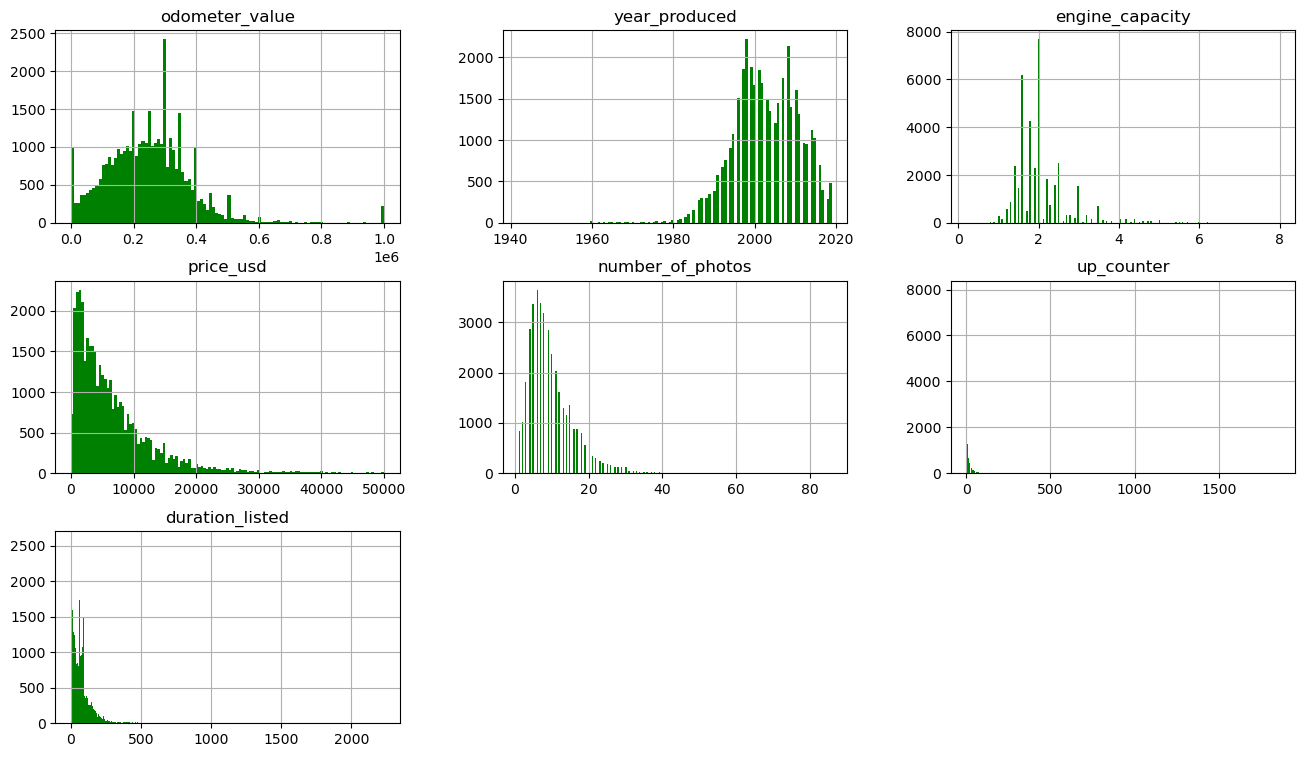

In [183]:
#plotando o dataframe de variáveis numéricas com a função de criar histogramas
num_data.hist(bins='auto', figsize=(16,9), layout=(3,3), color='green'); 

#### 1.6) Mostrando a distribuição das variáveis binárias (booleanas)

In [184]:
# mostrando apenas as variáveis de atributos booleanos (binários)
bool_data.head()

,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,False,False,False,False,True,True,True,False,True,False,True,True,True
1,False,False,True,False,True,False,False,True,True,False,False,False,True
2,False,False,True,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,True,True,False,False,False,False,True


Para analisar a quantidade de vezes que determinado valor de uma variável existe, é possível usar a função <span style="color:MediumOrchid;"> df.value_counts() </span> da biblioteca Pandas. Se for selecionado o parâmetro de normalização como verdadeiro, ao invés da função retornar o valor de vezes absoluto, ela retorna a <span style="color:green;"> proporção</span>. Foi definida uma função <span style="color:MediumOrchid;"> value_counts_all() </span> para iterar sobre todas as colunas do dataframe de dados booleanos e imprimir essa proporção para cada uma das variáveis.

Para fins de visualização, foi criada uma função para aplicar <span style="color:MediumOrchid;"> df.value_counts() </span> e plotar em gráfico de barras os resultados das proporções das variáveis binárias, como pode ser visto abaixo:

Proporção de valores contados para 'engine_has_gas':
False    0.965041
True     0.034959
Name: engine_has_gas, dtype: float64

Proporção de valores contados para 'has_warranty':
False    0.988347
True     0.011653
Name: has_warranty, dtype: float64

Proporção de valores contados para 'is_exchangeable':
False    0.647401
True     0.352599
Name: is_exchangeable, dtype: float64

Proporção de valores contados para 'feature_0':
False    0.771457
True     0.228543
Name: feature_0, dtype: float64

Proporção de valores contados para 'feature_1':
True     0.607199
False    0.392801
Name: feature_1, dtype: float64

Proporção de valores contados para 'feature_2':
False    0.77618
True     0.22382
Name: feature_2, dtype: float64

Proporção de valores contados para 'feature_3':
False    0.724196
True     0.275804
Name: feature_3, dtype: float64

Proporção de valores contados para 'feature_4':
False    0.758532
True     0.241468
Name: feature_4, dtype: float64

Proporção de valores contados para 'fe

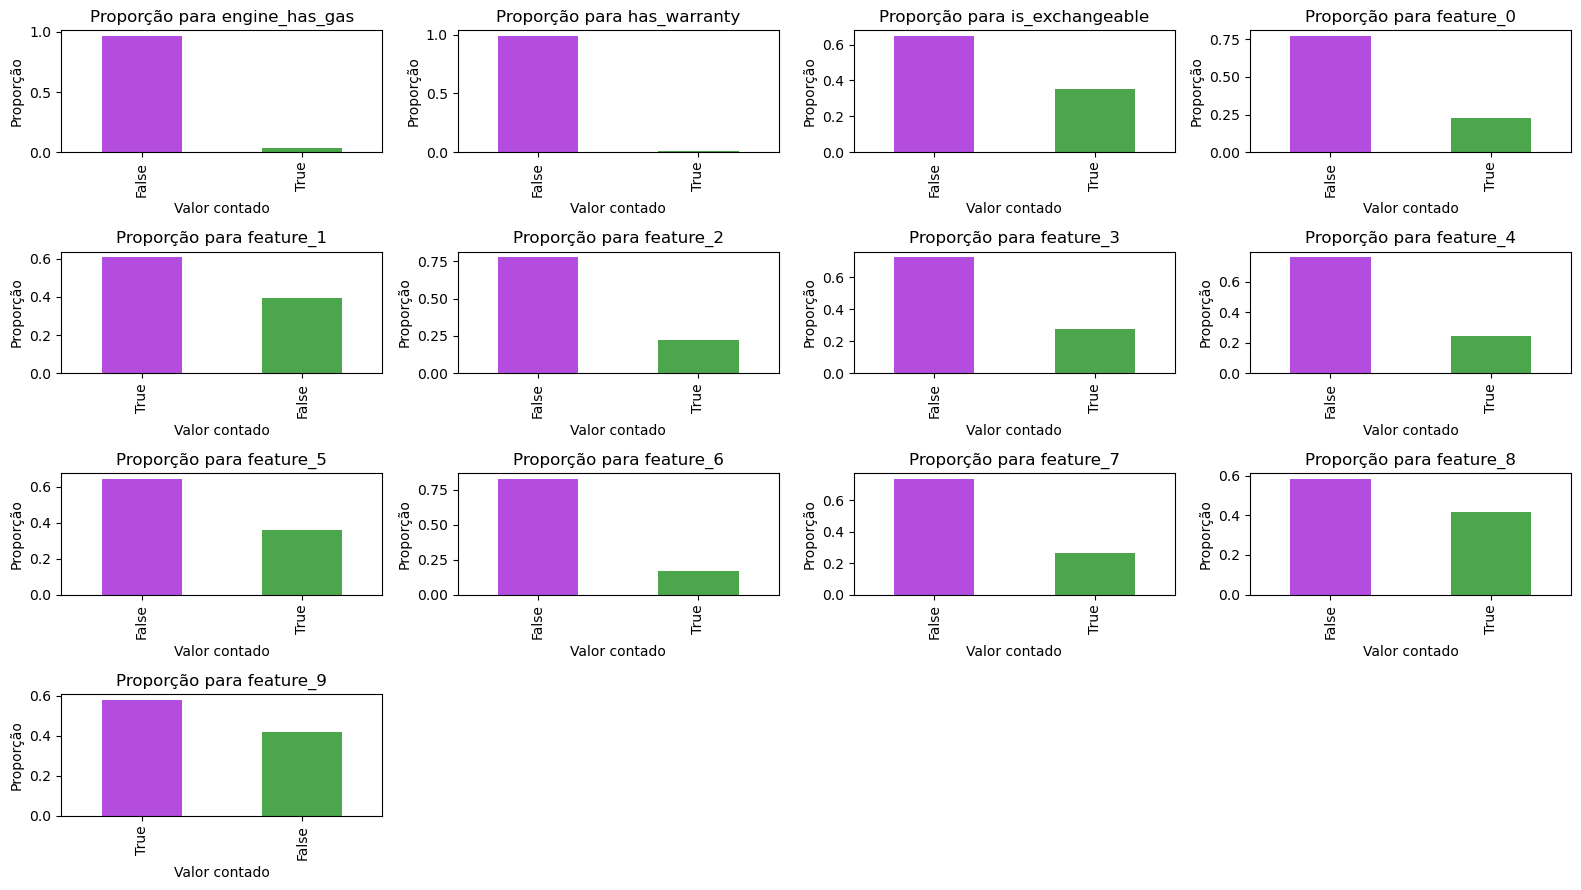

In [185]:
def value_counts_and_plot(bool_data): 
    fig = plt.figure(figsize=(16, 9))
    
    #variáveis para número de colunas e linhas do plot
    num_cols = 4  
    num_rows = 4

    # criando subplots em formato 4x4
    for i, column in enumerate(bool_data.columns, 1): #iterar sobre todas as colunas do df bool_data
        # mostrar resultados usando a função value_counts, mostrando a proporção de verdadeiro e falso para cada variável analisada
        counts = bool_data[column].value_counts(normalize=True)
        print(f"Proporção de valores contados para '{column}':\n{counts}\n")
        
        # iterando para adicionar um subplot estilo bar ao plot para cada variável (13 no total)
        ax = fig.add_subplot(num_rows, num_cols, i) 
        counts.plot(kind='bar', ax=ax, color=['#9400D3','green'], alpha=0.7)
        ax.set_title(f'Proporção para {column}')
        ax.set_xlabel('Valor contado')
        ax.set_ylabel('Proporção')

    #plotando a imagem
    plt.tight_layout()
    plt.show()

value_counts_and_plot(bool_data)

#### 1.7) Comentando a respeito dos dados encontrados

Acerca da análise exploratória inicial dos dados, pode-se afirmar que os dados em geral se encontram em escalas muito variadas, o que pode comprometer o desempenho do aprendizado do modelo se não houver pré-processamento antes do treinamento. Alguns pontos importantes a considerar são:
- Foi constatato que há tanto alguns dados faltantes quanto alguns dados duplicados no dataset.
- Nas variáveis numéricas, além das escalas bem diferentes, há algumas variáveis com bastantes <span style="color:green;"> outliers</span>, por exemplo, a variável <span style="color:green;"> odometer_value</span>. A variável <span style="color:green;"> engine_capacity </span> tem valores bem altos e baixos. 
- Nas variáveis binárias, <span style="color:green;"> engine_capacity </span> e <span style="color:green;"> has_warranty </span> possuem um valor quase total de exemplos falsos, e quase 0% de verdadeiros.

### Etapa 2: Limpeza e separação de dados
### Limpeza

#### 2.1) Apagar linhas com dados duplicados

In [186]:
# sabemos que são 40 linhas com dados duplicados
sum(duplicates)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [187]:
# apagar linhas de dados duplicados
df.drop_duplicates(inplace=True)

duplicates = df.duplicated()
print(sum(duplicates)) #soma dos índices dos duplicados

0


In [188]:
#conferindo se os dados duplicados foram apagados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38491 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38491 non-null  object 
 1   model_name         38491 non-null  object 
 2   transmission       38491 non-null  object 
 3   color              38491 non-null  object 
 4   odometer_value     38491 non-null  int64  
 5   year_produced      38491 non-null  int64  
 6   engine_fuel        38491 non-null  object 
 7   engine_has_gas     38491 non-null  bool   
 8   engine_type        38491 non-null  object 
 9   engine_capacity    38481 non-null  float64
 10  body_type          38491 non-null  object 
 11  has_warranty       38491 non-null  bool   
 12  state              38491 non-null  object 
 13  drivetrain         38491 non-null  object 
 14  price_usd          38491 non-null  float64
 15  is_exchangeable    38491 non-null  bool   
 16  location_region    384

Assim, foram apagadas as 40 linhas que continham dados duplicados, como confirmado por uma nova impressão de informações sobre o dataframe. De 38531 linhas não nulas para todas as variáveis além de engine_capacity, que contém 38521, o dataframe sem linhas com dados duplicados contém 38491 linhas para todas as variáveis e 38481 para engine_capacity.

#### 2.2) Selecionando a parte do dataset onde o state do carro é owned

É criado um novo dataframe chamado <span style="color:green;"> df_clean </span> que vai ser "limpo" a cada passo, formando ao final um dataset sem alguns dados específicos.


In [189]:
# criando novo df para armazenar o dataframe limpo
df_clean = df[df["state"] == "owned"] #selecionar o estado do carro como owned

df_clean['state'].value_counts() #confirmando que na variável state só há carros owned

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37715 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37715 non-null  object 
 1   model_name         37715 non-null  object 
 2   transmission       37715 non-null  object 
 3   color              37715 non-null  object 
 4   odometer_value     37715 non-null  int64  
 5   year_produced      37715 non-null  int64  
 6   engine_fuel        37715 non-null  object 
 7   engine_has_gas     37715 non-null  bool   
 8   engine_type        37715 non-null  object 
 9   engine_capacity    37705 non-null  float64
 10  body_type          37715 non-null  object 
 11  has_warranty       37715 non-null  bool   
 12  state              37715 non-null  object 
 13  drivetrain         37715 non-null  object 
 14  price_usd          37715 non-null  float64
 15  is_exchangeable    37715 non-null  bool   
 16  location_region    377

#### 2.3) Selecionando a parte do dataset onde o odômetro é menor que 999.999

In [190]:
df_clean = df_clean[df_clean["odometer_value"] < 999999] #selecionando apenas os valores abaixo de 999.999
df_clean['odometer_value'].sort_values() #verificando se os valores no df são abaixo de 999.999 para o odômetro mesmo


30591         1
34718         1
9571          1
34084         1
16566         1
          ...  
16851    966666
35195    976543
35285    986458
8404     987654
8278     999998
Name: odometer_value, Length: 37505, dtype: int64

#### 2.4) Selecionando a parte do dataset onde o preço é maior ou igual a 100

In [191]:
df_clean = df_clean[df_clean["price_usd"] >= 100] #selecionando apenas os valores  >= 100 dólares
df_clean['price_usd'].sort_values() #verificando se os valores do preço no df são maiores ou iguais a 100

6483       100.00
6396       100.00
9906       110.00
10167      120.00
30196      142.27
           ...   
31558    49950.00
35399    49950.00
34421    49999.00
29297    50000.00
7691     50000.00
Name: price_usd, Length: 37501, dtype: float64

#### 2.5) a) Criando uma coluna que será verdadeira se a transmissão for automática e falsa se não for

In [192]:
is_transmission_automatic = df_clean['transmission'] == 'automatic'
df_clean['is_transmission_automatic'] = is_transmission_automatic
# is_transmission_automatic
df_clean['is_transmission_automatic']

0         True
1         True
2         True
3        False
4         True
         ...  
38526     True
38527    False
38528     True
38529    False
38530     True
Name: is_transmission_automatic, Length: 37501, dtype: bool

#### 2.5) a) Criando uma coluna que será verdadeira se a engine_type for diesel e falsa se não for

In [193]:
is_engine_type_diesel = df_clean['engine_type'] == 'diesel'
df_clean['is_engine_type_diesel'] = is_engine_type_diesel
# is_engine_type_diesel

In [194]:
df_clean.info() #conferindo que as colunas foram criadas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37501 entries, 0 to 38530
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer_name          37501 non-null  object 
 1   model_name                 37501 non-null  object 
 2   transmission               37501 non-null  object 
 3   color                      37501 non-null  object 
 4   odometer_value             37501 non-null  int64  
 5   year_produced              37501 non-null  int64  
 6   engine_fuel                37501 non-null  object 
 7   engine_has_gas             37501 non-null  bool   
 8   engine_type                37501 non-null  object 
 9   engine_capacity            37491 non-null  float64
 10  body_type                  37501 non-null  object 
 11  has_warranty               37501 non-null  bool   
 12  state                      37501 non-null  object 
 13  drivetrain                 37501 non-null  obj

É possível ver que ambas as colunas novas desejadas foram criadas nos índices 30 e 31.
#### 2.6) Removendo as instâncias com carros raros

In [195]:
n_models = df_clean['model_name'].value_counts()
print(n_models,'\n')

non_rare_models = n_models > 15
print(non_rare_models)

Passat    1404
Astra      745
Golf       697
A6         684
Mondeo     624
          ... 
V8           1
SLX          1
TLX          1
RL           1
Aspen        1
Name: model_name, Length: 1112, dtype: int64 

Passat     True
Astra      True
Golf       True
A6         True
Mondeo     True
          ...  
V8        False
SLX       False
TLX       False
RL        False
Aspen     False
Name: model_name, Length: 1112, dtype: bool


In [196]:
non_rare_models = n_models[n_models >= 15].index

pd.DataFrame(non_rare_models)
# Filtrar o DataFrame original para manter apenas os modelos não raros
df_clean = df_clean[df_clean['model_name'].isin(non_rare_models)]

# Agora df_filtered contém apenas as instâncias de modelos de carros que aparecem mais de 15 vezes no dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34247 entries, 0 to 38530
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer_name          34247 non-null  object 
 1   model_name                 34247 non-null  object 
 2   transmission               34247 non-null  object 
 3   color                      34247 non-null  object 
 4   odometer_value             34247 non-null  int64  
 5   year_produced              34247 non-null  int64  
 6   engine_fuel                34247 non-null  object 
 7   engine_has_gas             34247 non-null  bool   
 8   engine_type                34247 non-null  object 
 9   engine_capacity            34247 non-null  float64
 10  body_type                  34247 non-null  object 
 11  has_warranty               34247 non-null  bool   
 12  state                      34247 non-null  object 
 13  drivetrain                 34247 non-null  obj

#### 2.7) Removendo as colunas state, transmission, engine_type, duration_listed e number_of_photos

In [197]:
df_clean = df_clean.drop(['state','transmission','engine_type','duration_listed','number_of_photos'], axis=1) #axis=1 para remover as colunas e não linhas
df_clean

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel
0,Subaru,Outback,silver,190000,2010,gasoline,False,2.5,universal,False,...,True,True,False,True,False,True,True,True,True,False
1,Subaru,Outback,blue,290000,2002,gasoline,False,3.0,universal,False,...,False,False,True,True,False,False,False,True,True,False
2,Subaru,Forester,red,402000,2001,gasoline,False,2.5,suv,False,...,False,False,False,False,False,False,True,True,True,False
3,Subaru,Impreza,blue,10000,1999,gasoline,False,3.0,sedan,False,...,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,black,280000,2001,gasoline,False,2.5,universal,False,...,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,silver,290000,2000,gasoline,False,3.5,sedan,False,...,False,False,True,True,False,False,True,True,True,False
38527,Chrysler,PT Cruiser,blue,321000,2004,diesel,False,2.2,hatchback,False,...,False,False,True,True,False,False,True,True,False,True
38528,Chrysler,300,blue,777957,2000,gasoline,False,3.5,sedan,False,...,False,False,True,True,False,False,True,True,True,False
38529,Chrysler,PT Cruiser,black,20000,2001,gasoline,False,2.0,minivan,False,...,False,False,False,False,False,False,False,True,False,False


Confirma-se que há <span style="color:green;"> 34.247 linhas e 27 colunas </span> no dataset após a limpeza dos dados, como desejado.

### Split
#### 2.8) Divisão estratificada entre train_val e teste
#### 2.8) a) Crie uma variável auxiliar (price_cat) utilizando a estratificação quantizada com 10 quantis a partir do preço (price_usd)

Para usar a estratificação quantizada, pode-se aplicar a função <span style="color:MediumOrchid;"> df.qcut()</span>, que define pontos específicos nos dados, chamados de <span style="color:MediumOrchid;"> quantis</span>, pelos quais eles podem ser agrupados.

In [198]:
#criando a variável price_cat
df_clean['price_cat'] = pd.qcut(df_clean['price_usd'], q=10, labels=False) #não foram especificados rótulos para cada categoria
print(df_clean['price_cat'],'\n')
np.unique(df_clean['price_cat']) #conferindo categorias

0        8
1        5
2        3
3        8
4        2
        ..
38526    3
38527    5
38528    4
38529    4
38530    3
Name: price_cat, Length: 34247, dtype: int64 



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [199]:
df_clean.info() #conferindo se foi criada a nova coluna de atributos price_cat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34247 entries, 0 to 38530
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer_name          34247 non-null  object 
 1   model_name                 34247 non-null  object 
 2   color                      34247 non-null  object 
 3   odometer_value             34247 non-null  int64  
 4   year_produced              34247 non-null  int64  
 5   engine_fuel                34247 non-null  object 
 6   engine_has_gas             34247 non-null  bool   
 7   engine_capacity            34247 non-null  float64
 8   body_type                  34247 non-null  object 
 9   has_warranty               34247 non-null  bool   
 10  drivetrain                 34247 non-null  object 
 11  price_usd                  34247 non-null  float64
 12  is_exchangeable            34247 non-null  bool   
 13  location_region            34247 non-null  obj

#### 2.8) b) Separe 20% para teste e 80% para treinamento e validação (train_val) e com o random_state igual a 42

In [200]:
#dividindo os dados em 80% para treino/validação e 20% pra teste
train_val, test = train_test_split(df_clean, test_size=0.2, stratify=df_clean['price_cat'], random_state=42) 

#verificando o tamanho dos conjuntos de treino/validação e teste
print("Tamanho do conjunto de treino/validação:", len(train_val))
print("Tamanho do conjunto de teste:", len(test))

Tamanho do conjunto de treino/validação: 27397
Tamanho do conjunto de teste: 6850


É necessário especificar o parâmetro stratify para fazer a divisão estratificada com base nos quantis especificados anteriormente. 

#### 2.9) Divisão estratificada entre treinamento e validação
#### 2.9) a) Crie uma nova variável auxiliar (train_val_price_cat) para fazer uma nova estratificação quantizada, mas desta vez no train_val ao invés do dataset completo

In [201]:
# Criar a variável auxiliar train_val_price_cat utilizando qcut com 10 quantis
train_val['train_val_price_cat'] = pd.qcut(train_val['price_usd'], q=10, labels=False)

# Verificar o DataFrame train_val com a nova variável auxiliar
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34247 entries, 0 to 38530
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer_name          34247 non-null  object 
 1   model_name                 34247 non-null  object 
 2   color                      34247 non-null  object 
 3   odometer_value             34247 non-null  int64  
 4   year_produced              34247 non-null  int64  
 5   engine_fuel                34247 non-null  object 
 6   engine_has_gas             34247 non-null  bool   
 7   engine_capacity            34247 non-null  float64
 8   body_type                  34247 non-null  object 
 9   has_warranty               34247 non-null  bool   
 10  drivetrain                 34247 non-null  object 
 11  price_usd                  34247 non-null  float64
 12  is_exchangeable            34247 non-null  bool   
 13  location_region            34247 non-null  obj

#### 2.9) b) Utilize essa nova variável para dividir o train_val entre treinamento (75%) e validação (25%)

In [202]:
#dividindo os dados em 75% para treino e 25% pra validação
train, val = train_test_split(train_val, test_size=0.25, stratify=train_val['train_val_price_cat'], random_state=42) 

#verificando o tamanho dos conjuntos de treino e validação 
print("Tamanho do conjunto de treino:", len(train))
print("Tamanho do conjunto de validação:", len(val))

#val
#test
#train

Tamanho do conjunto de treino: 20547
Tamanho do conjunto de validação: 6850


As variáveis auxiliares <span style="color:green;"> price_cat e train_val_price_cat </span> são somente para a divisão dos datasets e não devem ser adicionadas aos conjuntos de dados utilizados pelos modelos, portanto é necessário apagá-las antes de continuar a usar os dataframes para treinamento.

In [203]:
#apagando as variáveis auxiliares
test = test.drop(columns=['price_cat'], axis=1)
val = val.drop(columns=['price_cat','train_val_price_cat'], axis=1)
train = train.drop(columns=['price_cat','train_val_price_cat'], axis=1)

In [204]:
#val
#test
train

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel
16353,Volkswagen,Passat CC,brown,155000,2009,gasoline,False,2.0,coupe,False,...,False,False,True,True,False,True,True,True,True,False
27707,BMW,520,green,200000,1994,gasoline,False,2.0,universal,False,...,False,False,False,False,False,False,False,False,False,False
31161,Mazda,Xedos 6,green,325000,1996,gasoline,False,2.0,sedan,False,...,True,False,False,False,False,False,False,True,False,False
23822,Volvo,S80,black,300000,2001,gasoline,False,2.4,sedan,False,...,False,False,True,True,False,False,True,True,True,False
11695,Ford,Fusion,white,247500,2009,diesel,False,1.4,hatchback,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,Citroen,C3,blue,127000,2006,gasoline,False,1.4,hatchback,False,...,False,True,False,False,False,False,False,True,True,False
7681,Mini,Cooper,green,102000,2011,gasoline,False,1.6,hatchback,False,...,True,False,True,True,False,True,False,True,True,False
35662,Mercedes-Benz,A170,other,310000,2002,diesel,False,1.7,hatchback,False,...,False,False,False,False,False,False,False,False,False,True
26372,Nissan,Note,grey,65000,2013,gasoline,False,1.6,hatchback,False,...,False,False,False,True,False,True,True,True,True,False


Agora todos os dataframes <span style="color:MediumOrchid;"> val, train e teste </span> têm a mesma quantidade de colunas, sem considerar as variáveis auxiliares.

#### 2.10) Separe esses conjuntos entre X_train, y_train, X_val, y_val e X_test e y_test

In [205]:
target = 'price_usd' #variável a ser predita

#removendo a variável a ser predita do vetor de atributos X, e criando o vetor de alvos y
y_train = train[target]
X_train = train.drop(target, axis=1) #aqui nao estamos convertendo pra numpy, ainda está em dataframe. útil porque os nomes das colunas são mantidas

y_test = test[target]
X_test = test.drop(target, axis=1)

y_val = val[target]
X_val = val.drop(target, axis=1)

#### 2.11) Confira o shape apresentado para cada um deles está coerente com o esperado (60% train, 20% val, 20% test)

In [206]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(20547, 26) (20547,)
(6850, 26) (6850,)
(6850, 26) (6850,)


### Etapa 3: EDA de treinamento
#### 3.1) Variáveis numéricas (int e float)
#### 3.1) a) Calcule a correlação a partir do conjunto de treinamento

In [207]:
train_num = train.select_dtypes(include=['int64','float64'])
train_num_corr = train_num.corr(numeric_only=True) #correlação de pearson apenas para variáveis int, float
train_num_corr

,odometer_value,year_produced,engine_capacity,price_usd,up_counter
odometer_value,1.000000,-0.500035,0.141778,-0.406331,-0.009102
year_produced,-0.500035,1.000000,-0.001221,0.722702,0.014340
engine_capacity,0.141778,-0.001221,1.000000,0.313850,0.068808
price_usd,-0.406331,0.722702,0.313850,1.000000,0.053981
up_counter,-0.009102,0.014340,0.068808,0.053981,1.000000


#### 3.1) b) Plote os resultados da correlação em um gráfico de barras

<Axes: >

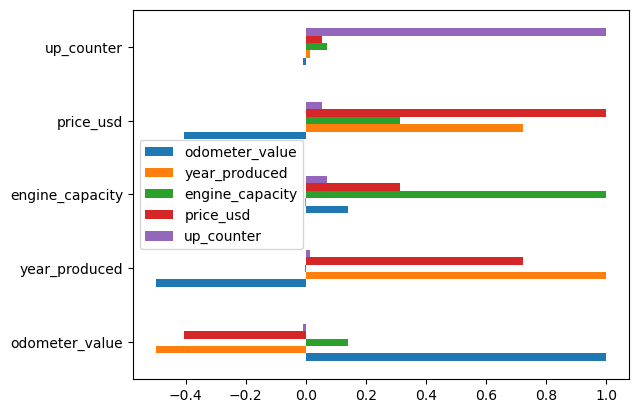

In [208]:
train_num_corr.plot(kind='barh')

#### 3.1) c) Repita as letras a. e b., calculando a correlação com o logaritmo do preço, ao invés do preço em si e comente sobre os resultados encontrados
##### Calculando o log do preço

In [209]:
train_price_log = np.log(train['price_usd'])
print(train_price_log,'\n') #comparando a variável price_usd com o seu log natural
print(train['price_usd'])

16353     9.249561
27707     7.782807
31161     6.396930
23822     8.101678
11695     8.517193
           ...    
6197      8.294050
7681      9.417355
35662     8.070906
26372     8.935904
35979    10.388995
Name: price_usd, Length: 20547, dtype: float64 

16353    10400.0
27707     2399.0
31161      600.0
23822     3300.0
11695     5000.0
          ...   
6197      4000.0
7681     12300.0
35662     3200.0
26372     7600.0
35979    32500.0
Name: price_usd, Length: 20547, dtype: float64


In [210]:
df_train_log = train.drop('price_usd',axis=1) #apagando coluna de preço sem o log
df_train_log['price_usd_log'] = train_price_log #adicionando coluna de preço calculado do log
df_train_log

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel,price_usd_log
16353,Volkswagen,Passat CC,brown,155000,2009,gasoline,False,2.0,coupe,False,...,False,True,True,False,True,True,True,True,False,9.249561
27707,BMW,520,green,200000,1994,gasoline,False,2.0,universal,False,...,False,False,False,False,False,False,False,False,False,7.782807
31161,Mazda,Xedos 6,green,325000,1996,gasoline,False,2.0,sedan,False,...,False,False,False,False,False,False,True,False,False,6.396930
23822,Volvo,S80,black,300000,2001,gasoline,False,2.4,sedan,False,...,False,True,True,False,False,True,True,True,False,8.101678
11695,Ford,Fusion,white,247500,2009,diesel,False,1.4,hatchback,False,...,False,False,False,False,False,False,False,False,True,8.517193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,Citroen,C3,blue,127000,2006,gasoline,False,1.4,hatchback,False,...,True,False,False,False,False,False,True,True,False,8.294050
7681,Mini,Cooper,green,102000,2011,gasoline,False,1.6,hatchback,False,...,False,True,True,False,True,False,True,True,False,9.417355
35662,Mercedes-Benz,A170,other,310000,2002,diesel,False,1.7,hatchback,False,...,False,False,False,False,False,False,False,False,True,8.070906
26372,Nissan,Note,grey,65000,2013,gasoline,False,1.6,hatchback,False,...,False,False,True,False,True,True,True,True,False,8.935904


##### Repetindo a letra a: calculando a correlação com o log do preço

In [211]:
train_num_log = df_train_log.select_dtypes(include=['int64','float64'])
train_num_log_corr = train_num_log.corr(numeric_only=True) #correlação de pearson apenas para variáveis int, float, agora com log de price_usd
train_num_log_corr

,odometer_value,year_produced,engine_capacity,up_counter,price_usd_log
odometer_value,1.000000,-0.500035,0.141778,-0.009102,-0.362826
year_produced,-0.500035,1.000000,-0.001221,0.014340,0.821932
engine_capacity,0.141778,-0.001221,1.000000,0.068808,0.295848
up_counter,-0.009102,0.014340,0.068808,1.000000,0.050819
price_usd_log,-0.362826,0.821932,0.295848,0.050819,1.000000


##### Repetindo a letra b: plotando o gráfico de barra

<Axes: >

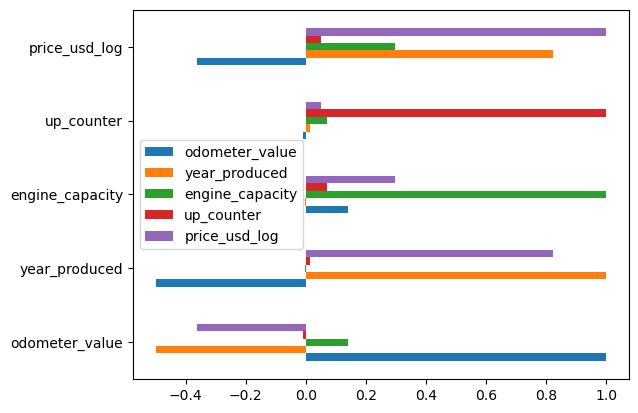

In [212]:
train_num_log_corr.plot(kind='barh')

A maior correlação constatada entre variáveis foi entre <span style="color:green;"> price_usd e year_produced</span>, em ambos os casos. Porém, após o cálculo do log natural de price_usd, essa correlação aumentou mais ainda.

#### 3.2) Variáveis booleanas (binárias): Plote um gráfico categórico em relação à saída

In [213]:
#selecionando variáveis booleanas do conjunto de treino
train_bool = train.select_dtypes(include='bool')
train_bool.head()

#adicionando a variável de saída ao dataframe booleano
train_bool['price_usd'] = train['price_usd']
train_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 16353 to 35979
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   engine_has_gas             20547 non-null  bool   
 1   has_warranty               20547 non-null  bool   
 2   is_exchangeable            20547 non-null  bool   
 3   feature_0                  20547 non-null  bool   
 4   feature_1                  20547 non-null  bool   
 5   feature_2                  20547 non-null  bool   
 6   feature_3                  20547 non-null  bool   
 7   feature_4                  20547 non-null  bool   
 8   feature_5                  20547 non-null  bool   
 9   feature_6                  20547 non-null  bool   
 10  feature_7                  20547 non-null  bool   
 11  feature_8                  20547 non-null  bool   
 12  feature_9                  20547 non-null  bool   
 13  is_transmission_automatic  20547 non-null 

##### Calculando a correlação de Pearson para as variáveis binárias em relação ao preço dos carros em dólares

In [214]:
train_bool_corr = train_bool.corr()
train_bool_corr

,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel,price_usd
engine_has_gas,1.000000,-0.008910,0.017961,0.002262,-0.010413,-0.011143,-0.030580,0.003693,-0.033324,-0.027369,-0.035872,-0.048478,-0.003852,0.021660,-0.141342,-0.067582
has_warranty,-0.008910,1.000000,-0.011304,-0.018994,-0.020386,-0.001779,0.025808,-0.008002,0.036117,0.030225,0.051910,0.028940,0.011310,0.024345,-0.011979,0.084228
is_exchangeable,0.017961,-0.011304,1.000000,0.003026,-0.032589,0.051852,-0.038402,0.005432,-0.022552,0.000347,-0.023962,0.004939,0.037282,0.016705,0.000612,-0.051932
feature_0,0.002262,-0.018994,0.003026,1.000000,-0.668873,-0.277050,-0.320204,-0.286332,-0.385945,-0.232590,-0.308045,-0.442440,-0.617530,-0.258828,0.004731,-0.297304
feature_1,-0.010413,-0.020386,-0.032589,-0.668873,1.000000,0.234517,0.307914,0.254698,0.385380,0.230692,0.301745,0.436837,0.370810,0.283752,0.008924,0.316467
feature_2,-0.011143,-0.001779,0.051852,-0.277050,0.234517,1.000000,0.416546,0.472532,0.401724,0.392025,0.362664,0.394200,0.359318,0.360886,0.031863,0.369634
feature_3,-0.030580,0.025808,-0.038402,-0.320204,0.307914,0.416546,1.000000,0.377829,0.478185,0.485193,0.507338,0.495758,0.361804,0.401165,0.045356,0.522116
feature_4,0.003693,-0.008002,0.005432,-0.286332,0.254698,0.472532,0.377829,1.000000,0.472885,0.386442,0.357127,0.392687,0.381092,0.430295,0.014596,0.370207
feature_5,-0.033324,0.036117,-0.022552,-0.385945,0.385380,0.401724,0.478185,0.472885,1.000000,0.374969,0.439111,0.521941,0.395823,0.444634,-0.066774,0.486990
feature_6,-0.027369,0.030225,0.000347,-0.232590,0.230692,0.392025,0.485193,0.386442,0.374969,1.000000,0.593616,0.429779,0.296271,0.328509,0.113839,0.485419


<Axes: title={'center': 'Correlação da variável price_usd com os atributos binários'}>

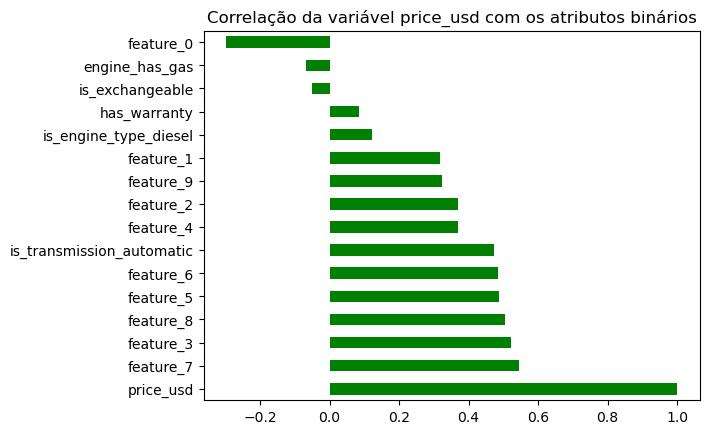

In [215]:
#separando as correlações em relação à variável "price_usd"
plor_train_bool_corr = train_bool_corr['price_usd'].sort_values(ascending=False)
#plor_train_bool_corr

#plotando o resultado das correlações
plor_train_bool_corr.plot(kind='barh',title='Correlação da variável price_usd com os atributos binários', color='green')

#### 3.3) Variáveis categóricas (não-binárias): Plote a distribuição das classes e sua correlação com a saída para cada variável categórica

In [216]:
train_categ = train.select_dtypes(include='object')
train_categ

,manufacturer_name,model_name,color,engine_fuel,body_type,drivetrain,location_region
16353,Volkswagen,Passat CC,brown,gasoline,coupe,front,Брестская обл.
27707,BMW,520,green,gasoline,universal,rear,Брестская обл.
31161,Mazda,Xedos 6,green,gasoline,sedan,front,Минская обл.
23822,Volvo,S80,black,gasoline,sedan,front,Минская обл.
11695,Ford,Fusion,white,diesel,hatchback,front,Витебская обл.
...,...,...,...,...,...,...,...
6197,Citroen,C3,blue,gasoline,hatchback,front,Минская обл.
7681,Mini,Cooper,green,gasoline,hatchback,front,Минская обл.
35662,Mercedes-Benz,A170,other,diesel,hatchback,front,Минская обл.
26372,Nissan,Note,grey,gasoline,hatchback,front,Минская обл.


##### Distribuição das classes categóricas

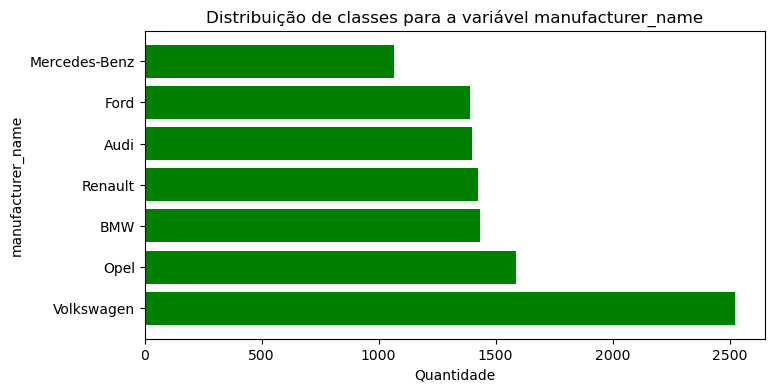

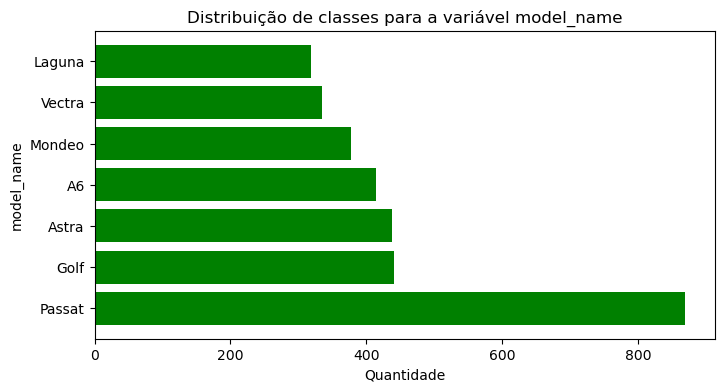

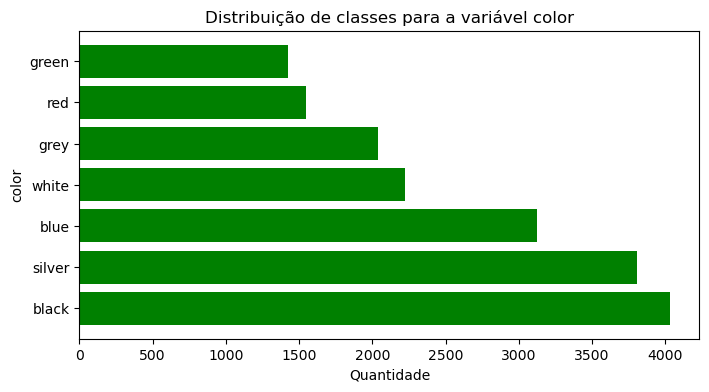

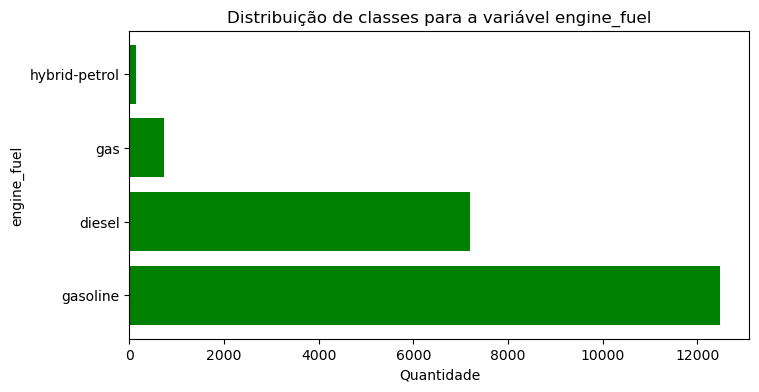

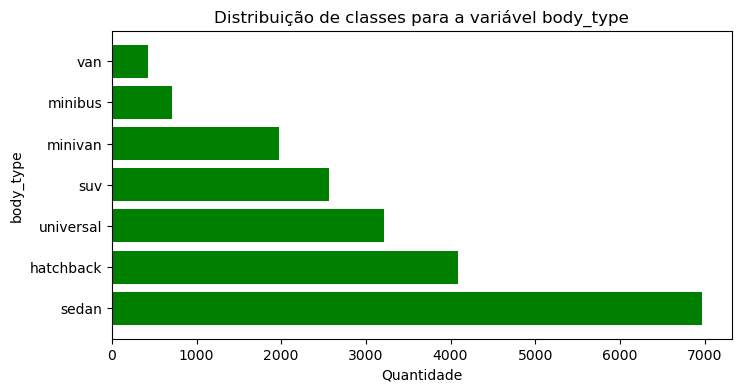

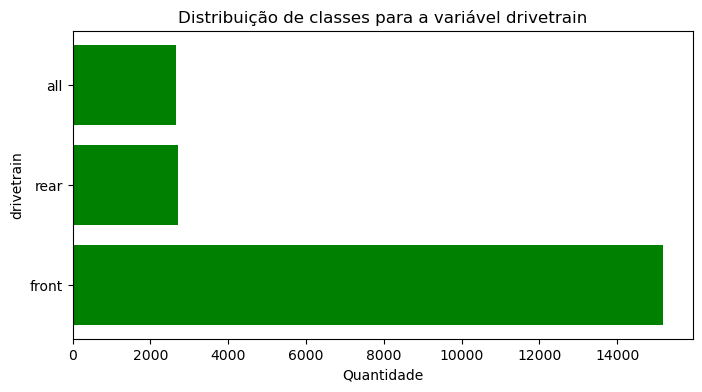

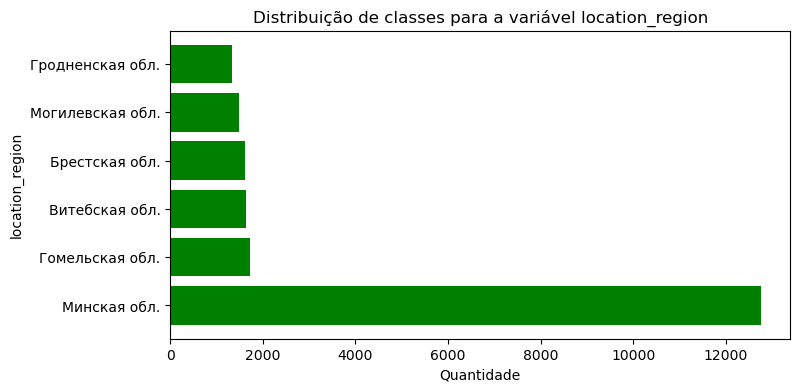

In [217]:
# plotando a distribuição das classes categóricas

max_classes = 7 #limitando o número de classes para melhor visualização dos gráficos
for column in train_categ:
    #contando a quantidade de exemplos em cada categoria
    train_categ_counts = train_categ[column].value_counts()
    
    #organizando os valores das classes para selecionar apenas as mais prevalentes
    sort_train_categ_counts = train_categ_counts.sort_values(ascending=False)
    top_categories = sort_train_categ_counts.iloc[:max_classes]
    
    # Plotando o gráfico de barras
    plt.figure(figsize=(8, 4))
    plt.barh(top_categories.index, top_categories.values, color='green')
    plt.ylabel(column)
    plt.xlabel('Quantidade')
    plt.title(f'Distribuição de classes para a variável {column}')
    plt.show()

##### Plotando a correlação das variáveis categóricas com a variável <span style="color:green;"> price_usd</span>. 

In [218]:
#adicionando a variável de saída ao dataframe categórico
train_categ['price_usd'] = train['price_usd']
train_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 16353 to 35979
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  20547 non-null  object 
 1   model_name         20547 non-null  object 
 2   color              20547 non-null  object 
 3   engine_fuel        20547 non-null  object 
 4   body_type          20547 non-null  object 
 5   drivetrain         20547 non-null  object 
 6   location_region    20547 non-null  object 
 7   price_usd          20547 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


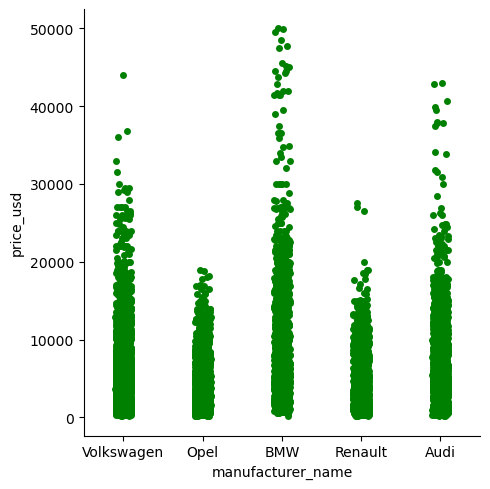

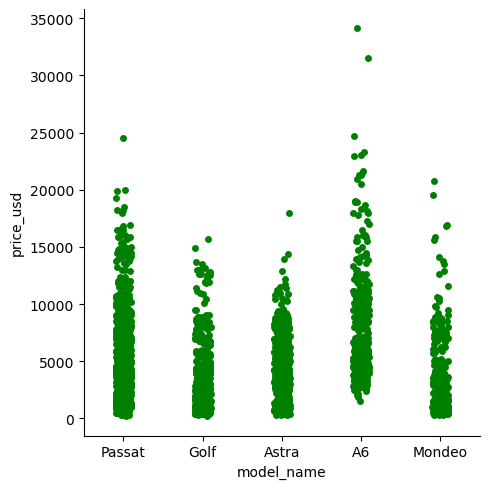

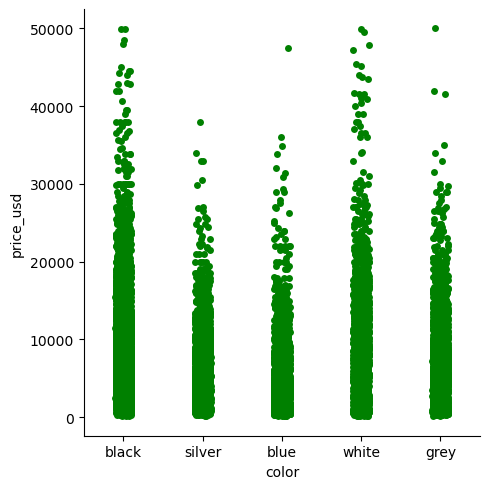

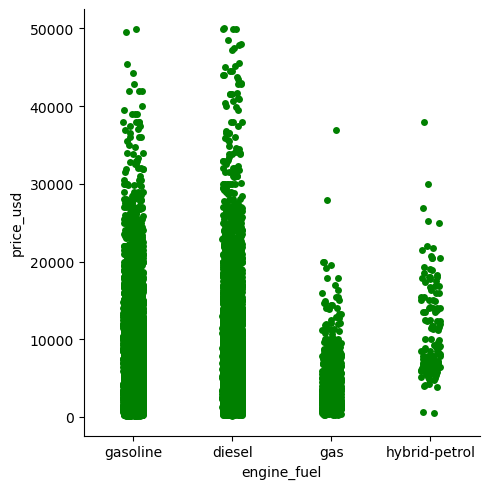

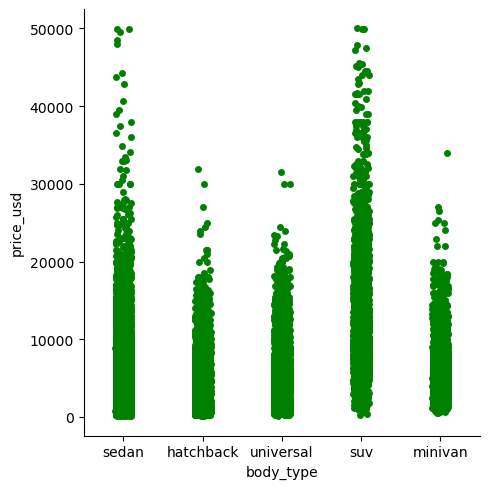

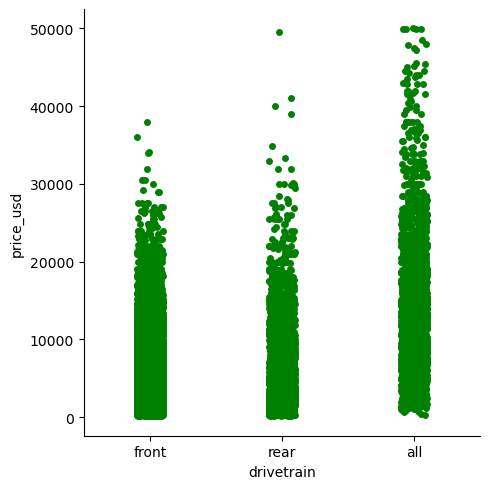

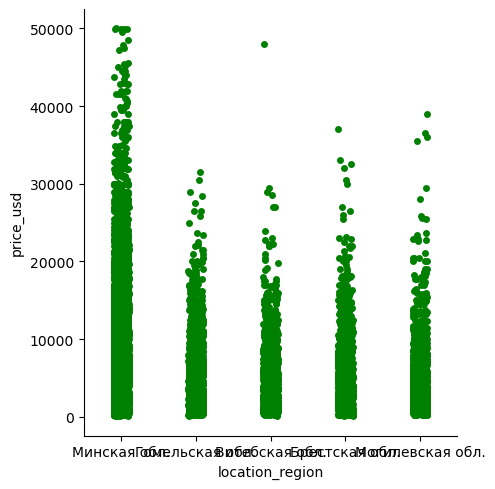

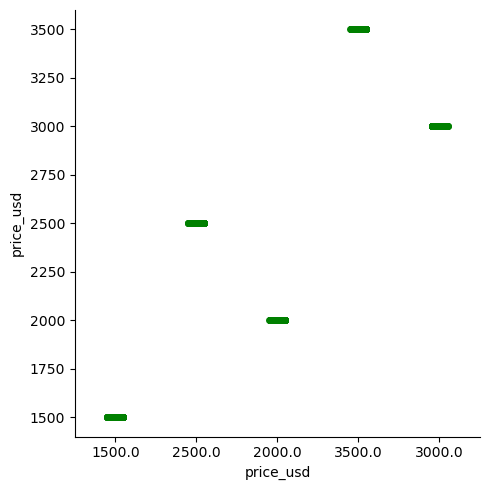

In [219]:
#plotando a correlação das variáveis com price_usd a partir da função catplot

max_classes = 5 #limitando o número de classes para melhor visualização dos gráficos
for column in train_categ:
    #contando a quantidade de exemplos em cada categoria
    train_categ_counts = train_categ[column].value_counts()
    
    #organizando os valores das classes para selecionar apenas as mais prevalentes
    sort_train_categ_counts = train_categ_counts.sort_values(ascending=False)
    top_categories = sort_train_categ_counts.iloc[:max_classes].index
    
    # Plotando o gráfico catplot
    sns.catplot(data = train_categ, y = 'price_usd', x = column, order = top_categories, color='green')


### Etapa 4) Seleção de hiperparâmetros

#### 4.1) Somente com valores numéricos
#### 4.1) a) Construa uma pipeline que contenha o pré-processamento e também contenha o modelo de regressão linear. Realize o treinamento e mostre os resultados no conjunto de treinamento e também no conjunto de validação.

In [220]:
X_train_num_var = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 16353 to 35979
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   odometer_value   20547 non-null  int64  
 1   year_produced    20547 non-null  int64  
 2   engine_capacity  20547 non-null  float64
 3   up_counter       20547 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 802.6 KB


In [226]:
#selecionando as variáveis numéricas
X_train_num_var = X_train.select_dtypes(include=['int64', 'float64'])

X_val_num_var = X_val.select_dtypes(include=['int64', 'float64'])

In [227]:
#definindo o pré-processamento que nesse caso só seleciona as variáveis numéricas, como anteriormente
preprocess = make_column_transformer(('passthrough', [0,3])) #passthrough: as colunas não serão transformadas
preprocess

ColumnTransformer(transformers=[('passthrough', 'passthrough', [0, 3])])

In [228]:
#criando uma pipeline para pré-processamento e regressão linear sem regularização
model = make_pipeline(preprocess, LinearRegression()) 
model.fit(X_train_num_var, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  [0, 3])])),
                ('linearregression', LinearRegression())])

##### Calculando <span style="color:MediumOrchid;"> RMSE </span> (raiz quadrada do erro médio quadrático) e <span style="color:MediumOrchid;"> MAPE </span> (erro absoluto percentual médio) para o teste sem escalonamento e sem regularização

In [230]:
#definindo as funções de cálculo do erro, pois serão utilizadas múltiplas vezes
def calc_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calc_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

In [231]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação
print(f'Para as variáveis numéricas, sem escalonamento e sem regularização:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model.predict(X_train_num_var)):.5f}')  #especificando 5 casas decimais para os testes
print(f'MAPE de treino: {calc_mape(y_train, model.predict(X_train_num_var)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model.predict(X_val_num_var)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model.predict(X_val_num_var)):.5f}')  


Para as variáveis numéricas, sem escalonamento e sem regularização:

RMSE de treino: 5211.54894
MAPE de treino: 1.62236

RMSE de validação: 5076.81756
MAPE de validação: 1.61378


#### 4.1) b) Repita a letra a., mas escalonando os dados com o StandardScaler ao invés de não escaloná-los. Teve alguma diferença nos resultados? Explique o porquê.

In [232]:
#As variáveis numéricas são as mesmas:
X_train_num_var

,odometer_value,year_produced,engine_capacity,up_counter
16353,155000,2009,2.0,9
27707,200000,1994,2.0,68
31161,325000,1996,2.0,2
23822,300000,2001,2.4,17
11695,247500,2009,1.4,5
...,...,...,...,...
6197,127000,2006,1.4,7
7681,102000,2011,1.6,1
35662,310000,2002,1.7,8
26372,65000,2013,1.6,97


In [233]:
#Definindo o pré-processamento que nesse caso realiza o escalonamento z-score a partir do StandardScaler()
preprocess_b = make_column_transformer(('passthrough', [0,3])) # agora não há mais passthrough: as colunas serão transformadas (escalonadas)
preprocess_b

ColumnTransformer(transformers=[('passthrough', 'passthrough', [0, 3])])

In [234]:
#criando a pipeline para pré-processamento com escalonamento e regressão linear sem regularização
model_b = make_pipeline(StandardScaler(), LinearRegression()) 
model_b.fit(X_train_num_var, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

##### Calculando <span style="color:MediumOrchid;"> RMSE </span> (raiz quadrada do erro médio quadrático) e <span style="color:MediumOrchid;"> MAPE </span> (erro absoluto percentual médio) para o teste com escalonamento e sem regularização


In [235]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para variáveis numéricas
print(f'Para as variáveis numéricas, com escalonamento e sem regularização:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_b.predict(X_train_num_var)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train, model_b.predict(X_train_num_var)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_b.predict(X_val_num_var)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_b.predict(X_val_num_var)):.5f}')  

Para as variáveis numéricas, com escalonamento e sem regularização:

RMSE de treino: 3461.83624
MAPE de treino: 0.77104

RMSE de validação: 3397.54366
MAPE de validação: 0.77939


Com escalonamento, os erros foram reduzidos significativamente.

#### 4.2) Somente com atributos booleanos
Construa uma nova pipeline de pré-processamento que seleciona somente os dados booleanos e repassa esses dados para um modelo de regressão linear. Treine esse novo modelo e observe os resultados.

In [236]:
#selecionando as variáveis booleanas
X_train_bool_var = X_train.select_dtypes(include='bool')

X_val_bool_var = X_val.select_dtypes(include='bool')

X_train_bool_var

,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel
16353,False,False,True,False,True,False,False,True,True,False,True,True,True,True,False
27707,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
31161,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False
23822,False,False,False,False,True,False,False,True,True,False,False,True,True,True,False
11695,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False
7681,False,False,False,False,True,True,False,True,True,False,True,False,True,True,False
35662,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
26372,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False


In [237]:
#definindo o pré-processamento que nesse caso só seleciona as variáveis booleanas
preprocess_bool = make_column_transformer(('passthrough', [0,3])) #passthrough: as colunas não serão transformadas
preprocess_bool

ColumnTransformer(transformers=[('passthrough', 'passthrough', [0, 3])])

In [238]:
#criando a pipeline para pré-processamento sem escalonamento e regressão linear sem regularização para booleanas
model_bool = make_pipeline(preprocess_bool, LinearRegression()) 
model_bool.fit(X_train_bool_var, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  [0, 3])])),
                ('linearregression', LinearRegression())])

In [239]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para variáveis booleanas
print(f'Para as variáveis booleanas, sem escalonamento e sem regularização:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_bool.predict(X_train_bool_var)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train, model_bool.predict(X_train_bool_var)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_bool.predict(X_val_bool_var)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_bool.predict(X_val_bool_var)):.5f}')  

Para as variáveis booleanas, sem escalonamento e sem regularização:

RMSE de treino: 5440.57864
MAPE de treino: 1.40188

RMSE de validação: 5353.46351
MAPE de validação: 1.41667


#### 4.3) Somente com atributos categóricos
Faça o mesmo que na letra anterior, mas utilizando os dados categóricos ao invés dos binários. Para tal, utilize o OneHotEncoder na pipeline de processamento

In [240]:
#selecionando as variáveis categóricas
X_train_cat_var = X_train.select_dtypes(include='object')

X_val_cat_var = X_val.select_dtypes(include='object')

X_train_cat_var

,manufacturer_name,model_name,color,engine_fuel,body_type,drivetrain,location_region
16353,Volkswagen,Passat CC,brown,gasoline,coupe,front,Брестская обл.
27707,BMW,520,green,gasoline,universal,rear,Брестская обл.
31161,Mazda,Xedos 6,green,gasoline,sedan,front,Минская обл.
23822,Volvo,S80,black,gasoline,sedan,front,Минская обл.
11695,Ford,Fusion,white,diesel,hatchback,front,Витебская обл.
...,...,...,...,...,...,...,...
6197,Citroen,C3,blue,gasoline,hatchback,front,Минская обл.
7681,Mini,Cooper,green,gasoline,hatchback,front,Минская обл.
35662,Mercedes-Benz,A170,other,diesel,hatchback,front,Минская обл.
26372,Nissan,Note,grey,gasoline,hatchback,front,Минская обл.


In [241]:
#definindo o pré-processamento que nesse caso só seleciona as variáveis categóricas
preprocess_cat = make_column_transformer((OneHotEncoder(), [0,6])) 
preprocess_cat

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(), [0, 6])])

In [242]:
#criando a pipeline para pré-processamento sem escalonamento e regressão linear sem regularização para categóricas
model_cat = make_pipeline(preprocess_cat, LinearRegression()) 
model_cat.fit(X_train_cat_var, y_train)
X_train_cat_var.head()

,manufacturer_name,model_name,color,engine_fuel,body_type,drivetrain,location_region
16353,Volkswagen,Passat CC,brown,gasoline,coupe,front,Брестская обл.
27707,BMW,520,green,gasoline,universal,rear,Брестская обл.
31161,Mazda,Xedos 6,green,gasoline,sedan,front,Минская обл.
23822,Volvo,S80,black,gasoline,sedan,front,Минская обл.
11695,Ford,Fusion,white,diesel,hatchback,front,Витебская обл.


##### Calculando <span style="color:MediumOrchid;"> RMSE </span> (raiz quadrada do erro médio quadrático) e <span style="color:MediumOrchid;"> MAPE </span> (erro absoluto percentual médio) para o teste para variáveis categóricas

In [243]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para variáveis booleanas
print(f'Para as variáveis categóricas, sem escalonamento e sem regularização:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_cat.predict(X_train_cat_var)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train, model_cat.predict(X_train_cat_var)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_cat.predict(X_val_cat_var)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_cat.predict(X_val_cat_var)):.5f}')  

Para as variáveis categóricas, sem escalonamento e sem regularização:

RMSE de treino: 5150.78006
MAPE de treino: 1.44137

RMSE de validação: 5072.55195
MAPE de validação: 1.46681


Ao realizar a definição das colunas a serem transformadas a partir de <span style="color:MediumOrchid;"> make_column_transformer() </span>, não foi possível utilizar o dataframe com as colunas ou a variável após a utilização da função <span style="color:MediumOrchid;"> select_dtypes() </span>, mesmo quando adicionada a função <span style="color:MediumOrchid;"> df.columns </span> no final para gerar apenas uma tupla com os nomes das variáveis e não um dataframe. Funcionou apenas quando utilizei os índices das colunas das variáveis, por exemplo: [0,3]. Fiquei um pouco confusa quanto a isso. 

#### 4.4) Todos os atributos: crie uma pipeline que utilizará todos os dados  <span style="color:green;"> (numéricos, binários e categóricos)</span>. Realize o treinamento e observe os resultados

In [244]:
#selecionando as variáveis anteriores
#variáveis numéricas
X_train_num_var = X_train_num_var.columns

#variáveis categóricas
X_train_cat_var = X_train_cat_var.columns

#variáveis binárias
X_train_bool_var = X_train_bool_var.columns

In [245]:
#definindo o pré-processamento para todas as variáveis
preprocess_all = make_column_transformer(('passthrough', X_train_num_var), 
                                         ('passthrough', X_train_bool_var), 
                                         (OneHotEncoder(), X_train_cat_var))
#preprocess_all = make_column_transformer(('passthrough', [0,3]), ('passthrough', [0,3]), (OneHotEncoder(), [0,6]))
preprocess_all
X_train_num_var

Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')

In [246]:
#criando a pipeline para pré-processamento de todas as variáveis sem escalonamento e regressão linear sem regularização para categóricas
model_all = make_pipeline(preprocess_all, LinearRegression()) 
model_all.fit(X_train, y_train) #para todas as variáveis

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough-1',
                                                  'passthrough',
                                                  Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                 ('passthrough-2',
                                                  'passthrough',
                                                  Index(['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

Dessa vez não obtive o erro <span style="color:red;"> IndexError: tuple index out of range </span> que tinha obtido ao fazer o pré-processamento das variáveis separadamente, funcionou selecionar as colunas para ter a tupla dos nomes delas. Fiquei confusa novamente com isso.

##### Calculando <span style="color:MediumOrchid;"> RMSE </span> (raiz quadrada do erro médio quadrático) e <span style="color:MediumOrchid;"> MAPE </span> (erro absoluto percentual médio) para o teste com todos os tipos de variáveis

In [247]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para todas variáveis 
print(f'Para todas as variáveis (binárias, categóricas e booleanas):\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_all.predict(X_train)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train, model_all.predict(X_train)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_all.predict(X_val)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_all.predict(X_val)):.5f}')  

Para todas as variáveis (binárias, categóricas e booleanas):

RMSE de treino: 3101.81034
MAPE de treino: 0.64393

RMSE de validação: 3084.87540
MAPE de validação: 0.64540


Observa-se que tanto o RMSE quanto o MAPE de treino e validação diminuíram quando foram usadas as variáveis em conjunto. Em relação aos outros resultados, esses últimos foram os que obtiveram menores erros.

#### 4.5) Polynomial features: Crie uma pipeline que irá aplicar PolynomialFeatures somente nos dados numéricos
Após essa aplicação, faça o escalonamento desses dados utilizando o StandardScaler e junte com o resto dos dados (binários e categóricos).

Descobri que o erro que estava acontecendo anteriormente e que me deixou confusa <span style="color:red;"> (ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed) </span>quando eu tentava fazer o fit no modelo era porque uma das variáveis que deveria ser um index com os nomes das colunas na verdade continuava um dataframe <span style="color:green;"> (X_train_bool_var)</span>. É um erro simples que eu facilmente poderia ter descoberto se tivesse checado as variáveis antes, então resolvi não corrigir as etapas anteriores porque não achei justo.

#### 4.5) a) Primeiramente, realize um treinamento utilizando somente o PolynomialFeatures com a regressão linear (teste ao menos para os valores d=2, 5 e 10). Observe os resultados e comente o que foi obtido

In [248]:
#pré-processamento com PolynomialFeatures
d = [2, 5, 10] #usando ao menos esses graus d do polinômio

In [249]:
#criando loop para percorrer os graus definidos para o polinômio
for i in d:
    print(f'Utilizando PolynomialFeatures() e StandardScaler() para os dados numéricos, e então adicionando todos os dados usando o grau', i)
    #definindo o pré-processamento
    preprocess_poly =  make_column_transformer(
        (PolynomialFeatures(i, include_bias=False), 
        X_train_num_var, StandardScaler(), X_train_num_var), #poly features + escalonamento pras variáveis numéricas
        ('passthrough', X_train_bool_var), #nenhuma transformação pras binárias
        (OneHotEncoder(), X_train_cat_var)) #one hot encoding pras categóricas
    
    #aplicando a pipeline ao modelo
    model_poly = make_pipeline(preprocess_poly, LinearRegression())
    model_poly.fit(X_train, y_train)
    
    # Erros de treino
    print(f'RMSE de treino: {calc_rmse(y_train, model_poly.predict(X_train)):.5f}')  
    print(f'MAPE de treino: {calc_mape(y_train, model_poly.predict(X_train)):.5f}\n')  

    # Erros de validação
    print(f'RMSE de validação: {calc_rmse(y_val, model_poly.predict(X_val)):.5f}')  
    print(f'MAPE de validação: {calc_mape(y_val, model_poly.predict(X_val)):.5f}\n')  

Utilizando PolynomialFeatures() e StandardScaler() para os dados numéricos, e então adicionando todos os dados usando o grau 2
RMSE de treino: 5173.40859
MAPE de treino: 1.59792

RMSE de validação: 5035.06940
MAPE de validação: 1.59545

Utilizando PolynomialFeatures() e StandardScaler() para os dados numéricos, e então adicionando todos os dados usando o grau 5
RMSE de treino: 5486.09843
MAPE de treino: 1.72733

RMSE de validação: 5368.99779
MAPE de validação: 1.73041

Utilizando PolynomialFeatures() e StandardScaler() para os dados numéricos, e então adicionando todos os dados usando o grau 10
RMSE de treino: 20975.12776
MAPE de treino: 3.51493

RMSE de validação: 34295.64101
MAPE de validação: 4.54701



Observa-se que o modelo está sofrendo de overfitting. Pode-se afirmar isso pelo fato de que o erro de treinamento (RMSE e MAPE) está sendo significativamente menor do que o erro de validação para todos os três graus polinomiais testados, o que sugere que o modelo está se ajustando muito bem aos dados de treinamento, mas não está generalizando bem para novos dados de validação. Além disso, aumentar o grau do polinômio não está melhorando a capacidade do modelo de generalizar, pois o modelo com grau 10 é o que demonstra os maiores erros.

#### 4.5) b) Repita o treinamento e avaliação, mas dessa vez utilizando o modelo Ridge (fazendo uma busca pelo melhor valor do hiperparâmetro alpha, testando ao menos 3 valores, sendo um deles alpha=1, que é o padrão).

In [250]:
# valores do hiperparâmetro alpha para regularização l2
alpha =  [0.1, 1, 10, 100, 500] 

# variando o grau do polinômio como na questão anterior: d= [2, 5, 10]
for j in alpha:
  for i in d:
    #definindo pipeline de pré-processamento, que continua a mesma
    preprocess_ridge = make_column_transformer(
        (PolynomialFeatures(i, include_bias=False), 
        X_train_num_var, StandardScaler(), X_train_num_var), #poly features + escalonamento pras variáveis numéricas
        ('passthrough', X_train_bool_var), #nenhuma transformação pras binárias
        (OneHotEncoder(), X_train_cat_var)) #one hot encoding pras categóricas

    #definindo o modelo, que agora é Linear Ridge Regression
    model_ridge = make_pipeline(preprocess_ridge, Ridge(j))
    model_ridge.fit(X_train, y_train)
    
    print(f'Para modelo com alpha = {j} e d = {i}:\n')
    # Erros de treino
    print(f'RMSE de treino: {calc_rmse(y_train, model_ridge.predict(X_train)):.5f}')  #diminuindo o numero de casas decimais p/ melhor visualização
    print(f'MAPE de treino: {calc_mape(y_train, model_ridge.predict(X_train)):.5f}')  

    # Erros de validação
    print(f'RMSE de validação: {calc_rmse(y_val, model_ridge.predict(X_val)):.5f}')  
    print(f'MAPE de validação: {calc_mape(y_val, model_ridge.predict(X_val)):.5f}\n')  
    print(f'----------------------------------------\n')


Para modelo com alpha = 0.1 e d = 2:

RMSE de treino: 5177.71738
MAPE de treino: 1.60083
RMSE de validação: 5036.75405
MAPE de validação: 1.60068

----------------------------------------

Para modelo com alpha = 0.1 e d = 5:

RMSE de treino: 5487.53255
MAPE de treino: 1.72747
RMSE de validação: 5368.01244
MAPE de validação: 1.73010

----------------------------------------

Para modelo com alpha = 0.1 e d = 10:

RMSE de treino: 17230.87198
MAPE de treino: 3.12153
RMSE de validação: 26721.01945
MAPE de validação: 3.81919

----------------------------------------

Para modelo com alpha = 1 e d = 2:

RMSE de treino: 5177.71738
MAPE de treino: 1.60083
RMSE de validação: 5036.75405
MAPE de validação: 1.60068

----------------------------------------

Para modelo com alpha = 1 e d = 5:

RMSE de treino: 5487.53255
MAPE de treino: 1.72747
RMSE de validação: 5368.01244
MAPE de validação: 1.73010

----------------------------------------

Para modelo com alpha = 1 e d = 10:

RMSE de treino: 172

Não consegui aumentar o grau do polinômio para mais que dez, pois estou usando o JupyterLab no meu computador e ele ficava travando. Aparentemente, mudar o valor de <span style="color:green;"> alpha </span>mas manter o mesmo número do grau <span style="color:green;"> d</span>, não melhora o desempenho do modelo, pois os erros se mantêm iguais. Quanto maior alpha para um d mais elevado, pior o desempenho se tornou. Fiquei na dúvida se realmente seria esse o comportamento esperado dos resultados ou se foi erro de implementação da minha parte.

#### 4.6) TTR: Repita o item 4.4, utilizando o TransformTargetRegressor para transformar a variável alvo

In [251]:
#definindo o pré-processamento para todas as variáveis novamente
preprocess_ttr = make_column_transformer(('passthrough', X_train_num_var), 
                                         ('passthrough', X_train_bool_var), 
                                         (OneHotEncoder(), X_train_cat_var))
                                        
pipeline_ttr = make_pipeline(preprocess_ttr, LinearRegression())

#transformando a variável alvo com log e exp dentro do pipeline
model_ttr = TransformedTargetRegressor(regressor=pipeline_ttr, func=np.log, inverse_func=np.exp)

#fazendo fit do modelo
model_ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('passthrough-1',
                                                                                       'passthrough',
                                                                                       Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                                                      ('passthrough-2',
                                                                                       'passthrough',
                                                                                       Index(['engine_has_gas', 'has_warranty', 'is_exchan...
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                                                      ('onehotencoder',
                                                                                       OneHotEncoder(),
                                                                                       Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                                                     ('linearregression',
                                                      LinearRegression())]))

In [252]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para todas as variáveis
print(f'Para todas as variáveis (binárias, categóricas e booleanas) usando TTR:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_ttr.predict(X_train)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train, model_ttr.predict(X_train)):.5f}\n')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_ttr.predict(X_val)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_ttr.predict(X_val)):.5f}')  

Para todas as variáveis (binárias, categóricas e booleanas) usando TTR:

RMSE de treino: 2391.71066
MAPE de treino: 0.33632

RMSE de validação: 2405.93313
MAPE de validação: 0.33223


#### 4.7) TTR+Poly(+Ridge): Faça o mesmo que no item anterior, mas utilizando o melhor modelo do item 4.5 como base

In [253]:
#usando o modelo com alpha = 0.1 e d = 2, pois foi um dos que obteve o menor valor de erros mape e rmse
# valores do hiperparâmetro alpha para regularização l2
alpha =  0.1
d = 2

#definindo pipeline de pré-processamento, que continua a mesma
preprocess_ridge = make_column_transformer(
    (PolynomialFeatures(d, include_bias=False), 
    X_train_num_var, StandardScaler(), X_train_num_var), #poly features + escalonamento pras variáveis numéricas
    ('passthrough', X_train_bool_var), #nenhuma transformação pras binárias
    (OneHotEncoder(), X_train_cat_var)) #one hot encoding pras categóricas

#definindo o modelo, que agora é Linear Ridge Regression
pipeline_ridge_ttr = make_pipeline(preprocess_ridge, Ridge(alpha))

# usando transformed targer regressor 
model_ttr_ridge = TransformedTargetRegressor(regressor=pipeline_ridge_ttr, func=np.log, inverse_func=np.exp)
model_ttr_ridge.fit(X_train,y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('polynomialfeatures',
                                                                                       PolynomialFeatures(include_bias=False),
                                                                                       Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                                                      ('passthrough',
                                                                                       'passthrough',
                                                                                       Index(['engine_has_ga...
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                                                      ('onehotencoder',
                                                                                       OneHotEncoder(),
                                                                                       Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                                                     ('ridge',
                                                      Ridge(alpha=0.1))]))

In [254]:
print(f'Para modelo com alpha = {alpha} e d = {d}:\n')
# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train, model_ttr_ridge.predict(X_train)):.5f}')  #diminuindo o numero de casas decimais p/ melhor visualização
print(f'MAPE de treino: {calc_mape(y_train, model_ttr_ridge.predict(X_train)):.5f}')  

# Erros de validação
print(f'RMSE de validação: {calc_rmse(y_val, model_ttr_ridge.predict(X_val)):.5f}')  
print(f'MAPE de validação: {calc_mape(y_val, model_ttr_ridge.predict(X_val)):.5f}\n')  

Para modelo com alpha = 0.1 e d = 2:

RMSE de treino: 5567.29848
MAPE de treino: 1.14883
RMSE de validação: 5417.49845
MAPE de validação: 1.14885



#### 4.8) Comente sobre o que foi descoberto nessa etapa da atividade
Usar o TransformedTargetRegressor para aplicar transformação à variável alvo por meio do log e retornando através da exponenciação foi a técnica que obteve os melhores resultados. Aparentemente, usar TTR+Poly(+Ridge) não melhorou o desempenho do modelo.


### Etapa 5: Retreinamento e resultados no conjunto de teste
#### 5.1) Regressão linear com todos os atributos (item 4.4): retreinamento e resultados de teste

In [255]:
#concatenando as entradas
X_train_val = pd.concat([X_train, X_val], axis=0) #axis=0 para serem concatenadas na vertical

#concatenando as saídas y
y_train_val = pd.concat([y_train,y_val], axis=0)

#confirmando que os dfs foram concatenados corretamente
print(X_train.shape)
print(X_val.shape)
print(X_train_val.shape)

(20547, 26)
(6850, 26)
(27397, 26)


In [256]:
model_all.fit(X_train_val, y_train_val) #usando o modelo agora para o conjunto de treino e validação

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough-1',
                                                  'passthrough',
                                                  Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                 ('passthrough-2',
                                                  'passthrough',
                                                  Index(['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [257]:
# Imprimindo os erros RMSE e MAPE
print(f'Para todas as variáveis (binárias, categóricas e booleanas), agora com resultados no conjunto de teste:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train_val, model_all.predict(X_train_val)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train_val, model_all.predict(X_train_val)):.5f}\n')  

# Erros de teste
print(f'RMSE de teste: {calc_rmse(y_test, model_all.predict(X_test)):.5f}')  
print(f'MAPE de teste: {calc_mape(y_test, model_all.predict(X_test)):.5f}')  

Para todas as variáveis (binárias, categóricas e booleanas), agora com resultados no conjunto de teste:

RMSE de treino: 3097.96784
MAPE de treino: 0.64045

RMSE de teste: 3129.77234
MAPE de teste: 0.64603


#### 5.2) Polynomial features (item 4.5): retreinamento e resultados de teste

In [258]:
#usando o modelo com alpha = 0.1 e d = 2, pois foi um dos que obteve o menor valor de erros mape e rmse
alpha =  0.1
d = 2

#definindo pipeline de pré-processamento
preprocess_poly_test = make_column_transformer(
    (PolynomialFeatures(d, include_bias=False), 
    X_train_num_var, StandardScaler(), X_train_num_var), 
    ('passthrough', X_train_bool_var), 
    (OneHotEncoder(), X_train_cat_var)) 

model_poly_test = make_pipeline(preprocess_poly_test, Ridge(alpha))

In [259]:
#definindo o modelo
model_poly_test = make_pipeline(preprocess_ridge, Ridge(alpha))
model_poly_test.fit(X_train_val,y_train_val)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False),
                                                  Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                 ('passthrough', 'passthrough',
                                                  Index(['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=0.1))])

In [260]:
# Imprimindo os erros RMSE e MAPE
print(f'Para o modelo usando atributos polinomiais, agora com resultados no conjunto de teste:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train_val, model_poly_test.predict(X_train_val)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train_val, model_poly_test.predict(X_train_val)):.5f}\n')  

# Erros de teste
print(f'RMSE de teste: {calc_rmse(y_test, model_poly_test.predict(X_test)):.5f}')  
print(f'MAPE de teste: {calc_mape(y_test, model_poly_test.predict(X_test)):.5f}')  

Para o modelo usando atributos polinomiais, agora com resultados no conjunto de teste:

RMSE de treino: 5142.84783
MAPE de treino: 1.59620

RMSE de teste: 5167.77438
MAPE de teste: 1.54660


#### 5.3) TTR (item 4.6): retreinamento e resultados de teste

In [261]:
#fazendo fit do modelo já treinado
model_ttr.fit(X_train_val, y_train_val)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('passthrough-1',
                                                                                       'passthrough',
                                                                                       Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                                                      ('passthrough-2',
                                                                                       'passthrough',
                                                                                       Index(['engine_has_gas', 'has_warranty', 'is_exchan...
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                                                      ('onehotencoder',
                                                                                       OneHotEncoder(),
                                                                                       Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                                                     ('linearregression',
                                                      LinearRegression())]))

In [262]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para todas as variáveis
print(f'Para todas as variáveis (binárias, categóricas e booleanas) usando TTR no conjunto de treino:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train_val, model_ttr.predict(X_train_val)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train_val, model_ttr.predict(X_train_val)):.5f}\n')  

# Erros de teste
print(f'RMSE de teste: {calc_rmse(y_test, model_ttr.predict(X_test)):.5f}')  
print(f'MAPE de teste: {calc_mape(y_test, model_ttr.predict(X_test)):.5f}') 

Para todas as variáveis (binárias, categóricas e booleanas) usando TTR no conjunto de treino:

RMSE de treino: 2398.31561
MAPE de treino: 0.33610

RMSE de teste: 2379.81766
MAPE de teste: 0.33339


#### 5.4) TTR+Poly(+Ridge) (item 4.7): retreinamento e resultados de teste

In [263]:
model_ttr_ridge.fit(X_train_val, y_train_val)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('polynomialfeatures',
                                                                                       PolynomialFeatures(include_bias=False),
                                                                                       Index(['odometer_value', 'year_produced', 'engine_capacity', 'up_counter'], dtype='object')),
                                                                                      ('passthrough',
                                                                                       'passthrough',
                                                                                       Index(['engine_has_ga...
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'is_transmission_automatic', 'is_engine_type_diesel'],
      dtype='object')),
                                                                                      ('onehotencoder',
                                                                                       OneHotEncoder(),
                                                                                       Index(['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type',
       'drivetrain', 'location_region'],
      dtype='object'))])),
                                                     ('ridge',
                                                      Ridge(alpha=0.1))]))

In [264]:
# Imprimindo os erros RMSE e MAPE para os grupos de treino e validação para todas as variáveis
print(f'Para todas as variáveis (binárias, categóricas e booleanas) usando TTR e atributos polinomiais no conjunto de treino:\n')

# Erros de treino
print(f'RMSE de treino: {calc_rmse(y_train_val, model_ttr_ridge.predict(X_train_val)):.5f}')  
print(f'MAPE de treino: {calc_mape(y_train_val, model_ttr_ridge.predict(X_train_val)):.5f}\n')  

# Erros de teste
print(f'RMSE de teste: {calc_rmse(y_test, model_ttr_ridge.predict(X_test)):.5f}')  
print(f'MAPE de teste: {calc_mape(y_test, model_ttr_ridge.predict(X_test)):.5f}') 

Para todas as variáveis (binárias, categóricas e booleanas) usando TTR e atributos polinomiais no conjunto de treino:

RMSE de treino: 5531.05501
MAPE de treino: 1.14777

RMSE de teste: 5596.85142
MAPE de teste: 1.11738


### Etapa 6: Análise dos resultados 
#### 6.1) Mostre um scatter plot entre os valores reais e preditos para o melhor modelo encontrado

Considera-se que o melhor modelo foi o treinado usando TransformedTargetRegressor do <span style="color:MediumOrchid;"> item 5.3</span>, onde foram obtidos os seguintes valores de erros:

_RMSE de treino: 2395.2745829912 e MAPE de treino: 0.3353004742_

_RMSE de teste: 2375.2251677647 e MAPE de teste: 0.3327485007_

Por este motivo, ele será usado para computar o gráfico da relação entre os valores reais e preditos.

In [265]:
y_test = y_test.to_numpy() #para usar sns.scatterplot()
error_dist = y_test - model_ttr.predict(X_test)

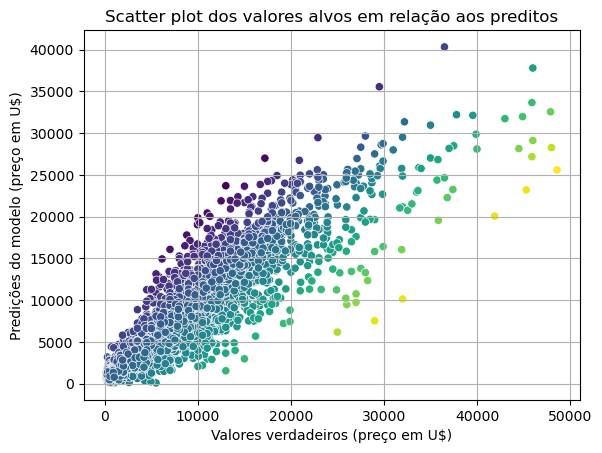

In [266]:
# criando uma figura para o scatter plot
plt.figure()
plt.xlabel('Valores verdadeiros (preço em U$)')
plt.ylabel('Predições do modelo (preço em U$)')

#usando hue e palette para dar cores aos dados de acordo com a posição na distribuição e sua distância do valor real alvo
sns.scatterplot(x=y_test, y=model_ttr.predict(X_test), hue=error_dist, palette='viridis', legend=False)
plt.title('Scatter plot dos valores alvos em relação aos preditos')
plt.grid()
plt.show()

#### 6.2) Mostre a distribuição do erro das predições

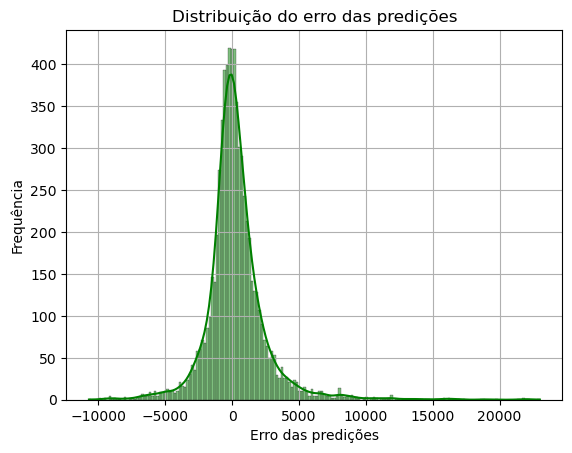

In [267]:
#Distribuição de erro

plt.figure()
sns.histplot(error_dist, kde=True, color='green') #parâmetro kde=True plota uma curva sobre os dados para suavizá-los
plt.xlabel('Erro das predições')
plt.ylabel('Frequência')
plt.title('Distribuição do erro das predições')
plt.grid()
plt.show()

#### 6.3) As suas conclusões mudariam caso a métrica de avaliação considerada fosse o RMSE ao invés do MAPE? Explique.

Sim, as conclusões mudariam. O valor a ser minimizado seria o RMSE, que para todos os resultados foi considerado relativamente alto, mesmo que os menores valores obtidos de RMSE tenham sido com o mesmo modelo em que foram obtidos os menores valores com MAPE.

### Etapa 7: Conclusão
#### 7.1) Comentários gerais sobre o trabalho

Durante o trabalho, pude aprender várias funções de bibliotecas muito úteis para análise de dados, como Pandas e Seaborn. Eu senti dificuldados principalmente no início e na etapa de seleção de hiperparâmetros, e acho que cometi alguns erros. Tenho ainda algumas dúvidas sobre a interpretação das métricas. Acho que meus resultados não foram muito bons por conta disso, e pelo fato de que não sou programadora nata, mas gostei muito de aprender e de conseguir chegar ao final. Demorei muito no início para conseguir passar de uma etapa para outra, mas da metade para o fim do trabalho consegui evoluir mais rápido, e espero continuar evoluindo nessa questão nos próximos. Sei que tudo isso que estou aprendendo vai ser muito útil para os projetos futuros, e toda a parte de análise experimental dos dados foi muito legal porque conseguia enxergar como isso pode ser aplicado a dados de saúde pública e de saúde em geral, o que é da minha área de interesse.

Percebi que para os próximos trabalhos seria interessante organizar melhor algumas partes, salvando os modelos treinados para poder usar diretamente em etapas seguintes e plotando os resultados das métricas em tabelas, por exemplo, algo que não acertei fazer dessa vez. Pretendo utilizar o Google Colab ou o Kaggle ao invés do JupyterLab na minha máquina pessoal, para poder treinar modelos mais robustos ou computacionalmente custosos nos próximos trabalhos.

#### 7.2) Existe algum viés nos dados do dataset, por exemplo, por serem dados de anúncios de vendas? O que isso poderia influenciar nos modelos que estão sendo desenvolvidos? E quais limitações isso pode trazer?

Creio que existam sim viéses nos dados por serem anúncios de vendas, pois são dados que são fornecidos antes da compra pelo vendedor e não após pelo comprador, então o preço final pode variar. Além disso, os dados têm a questão de serem de um país em específico (Belarus), e fatores culturais e industriais de consumo e de acesso a determinadas marcas podem influenciar o resultado final. Há também o fato de que o dataset foi adquirido em 2019, e alguns valores podem já estar defasados. Creio que possam haver limitações quanto ao preço de carros de modelos mais novos, ou dos que tenham alguma característica que foi retirada como atributo durante o processo de limpeza dos dados, fazendo com que o modelo não generalize tão bem nesses casos.